In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def swap_sentence(df):
    df_swapped = df.copy()
    
    df_swapped["sentence_1"] = df["sentence_2"]
    df_swapped["sentence_2"] = df["sentence_1"]
    df_swapped["id"] = df_swapped["id"] + "_swapped"

    df_swapped = pd.concat([df, df_swapped], ignore_index=True)
    return df_swapped

In [17]:
train_df = pd.read_csv('../data/train.csv')
dev_df = pd.read_csv("../data/dev.csv")

# train data sentence swap
train_swapped = swap_sentence(train_df)
train_swapped.to_csv("../data/train2.csv", index=False)

# dev data sentence swap
dev_swapped = swap_sentence(dev_df)
dev_swapped.to_csv("../data/dev2.csv", index=False)


# sentence swap without label value 0.0
train_without0_df = train_df[train_df["label"] != 0.0]
train_only0_df = train_df[train_df["label"] == 0.0]
train_without0_swapped = swap_sentence(train_without0_df)
pd.concat([train_without0_swapped, train_only0_df], ignore_index=True).to_csv("../data/train3.csv", index=False)

In [3]:
def copy_sentence(df):
    
    df_copy = df[df["label"] == 0][500:1500].copy()
    df_copy["sentence_2"] = df["sentence_1"]
    df_copy["label"] = 5.0
    df_copy["binary-label"] = 1.0
    df_copy["id"] = df_copy["id"] + "_copied"

    df_copied = pd.concat([df, df_copy], ignore_index=True)
    return df_copied

In [13]:
swapped_without0 = pd.read_csv("../data/train3.csv")

print(train_swapped.shape[0])
print(dev_swapped.shape[0])
print(swapped_without0.shape[0])

18648
1100
16529


In [14]:
print(train_swapped[train_swapped["label"] == 0.0].shape[0])
print(swapped_without0[swapped_without0["label"] == 0.0].shape[0])

4238
2119


In [15]:
train_all = pd.read_csv('../preprocessed/train_all.csv')
train_all_swapped = swap_sentence(train_all)
train_all_swapped.to_csv("../data/train_all_swapped.csv", index=False)

train_repeat = pd.read_csv('../preprocessed/train_repeat.csv')
train_repeat_swapped = swap_sentence(train_all)
train_repeat_swapped.to_csv("../data/train_repeat_swapped.csv", index=False)


train_spacing_repeat = pd.read_csv('../preprocessed/train_spacing_repeat.csv')
train_spacing_repeat_swapped = swap_sentence(train_all)
train_spacing_repeat_swapped.to_csv("../data/train_spacing_repeat_swapped.csv", index=False)


train_spacing_spell = pd.read_csv('../preprocessed/train_spacing_spell.csv')
train_spacing_spell_swapped = swap_sentence(train_all)
train_spacing_spell_swapped.to_csv("../data/train_spacing_spell_swapped.csv", index=False)


train_spacing = pd.read_csv('../preprocessed/train_spacing.csv')
train_spacing_swapped = swap_sentence(train_all)
train_spacing_swapped.to_csv("../data/train_spacing_swapped.csv", index=False)


train_spell_repeat = pd.read_csv('../preprocessed/train_spell_repeat.csv')
train_spell_repeat_swapped = swap_sentence(train_all)
train_spell_repeat_swapped.to_csv("../data/train_spell_repeat_swapped.csv", index=False)


train_spell = pd.read_csv('../preprocessed/train_spell.csv')
train_spell_swapped = swap_sentence(train_all)
train_spell_swapped.to_csv("../data/train_spell_swapped.csv", index=False)




In [16]:
train_all_without_0 = train_all[train_all["label"] != 0.0]
train_all_0 = train_all[train_all["label"] == 0.0]
train_all_without0_swapped = swap_sentence(train_all_without_0)
pd.concat([train_all_without0_swapped, train_all_0], ignore_index=True).to_csv("../data/train_all_without0_swapped.csv", index=False)

In [37]:
# 750
df = pd.read_csv('../data/train_all_swapped.csv')
train_all_swapped_copied = copy_sentence(df)
train_all_swapped_copied.to_csv("../data/train_all_swapped_copied.csv", index=False)

# 750
df2 = pd.read_csv('../data/train_spacing_repeat_swapped.csv')
train_spacing_repeat_swapped_copied = copy_sentence(df2)
train_spacing_repeat_swapped_copied.to_csv("../data/train_spacing_repeat_swapped_copied.csv", index=False)

# 750
df3 = pd.read_csv("../data/train_all_without0_swapped.csv")
train_all_without0_swapped_copied = copy_sentence(df3)
train_all_without0_swapped_copied.to_csv("../data/train_all_without0_swapped_copied.csv", index=False)

In [48]:
# 500
df = pd.read_csv('../data/train_all_swapped.csv')
train_all_swapped_copied = copy_sentence(df)
train_all_swapped_copied.to_csv("../data/train_all_swapped_copied.csv", index=False)


# 500
df3 = pd.read_csv("../data/train_all_without0_swapped.csv")
train_all_without0_swapped_copied = copy_sentence(df3)
train_all_without0_swapped_copied.to_csv("../data/train_all_without0_swapped_copied.csv", index=False)

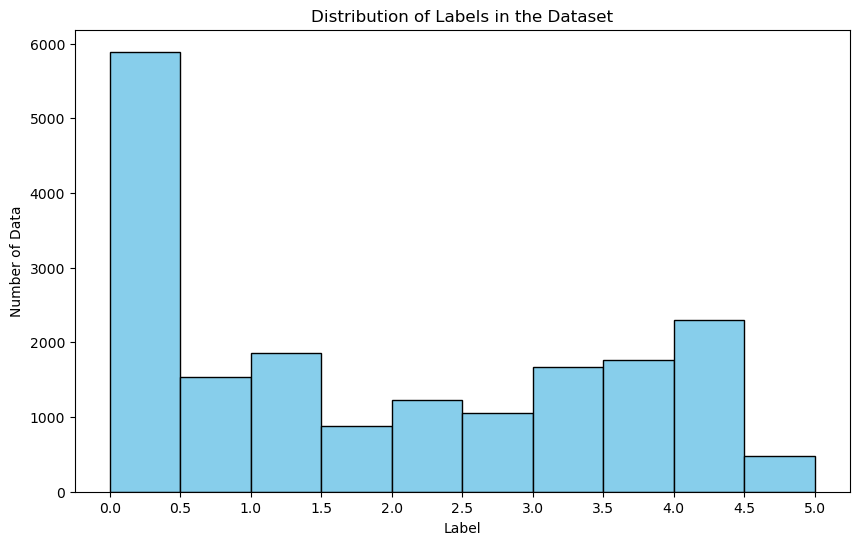

In [61]:
plt.figure(figsize=(10, 6))
train_swapped['label'].plot(kind='hist', bins=np.arange(0, 5.5, 0.5), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()

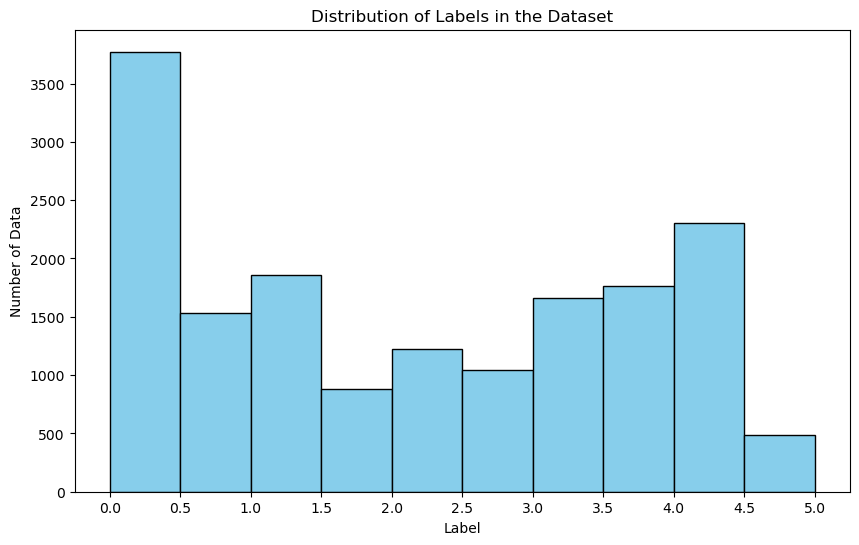

In [60]:
plt.figure(figsize=(10, 6))
swapped_without0['label'].plot(kind='hist', bins=np.arange(0, 5.5, 0.5), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()

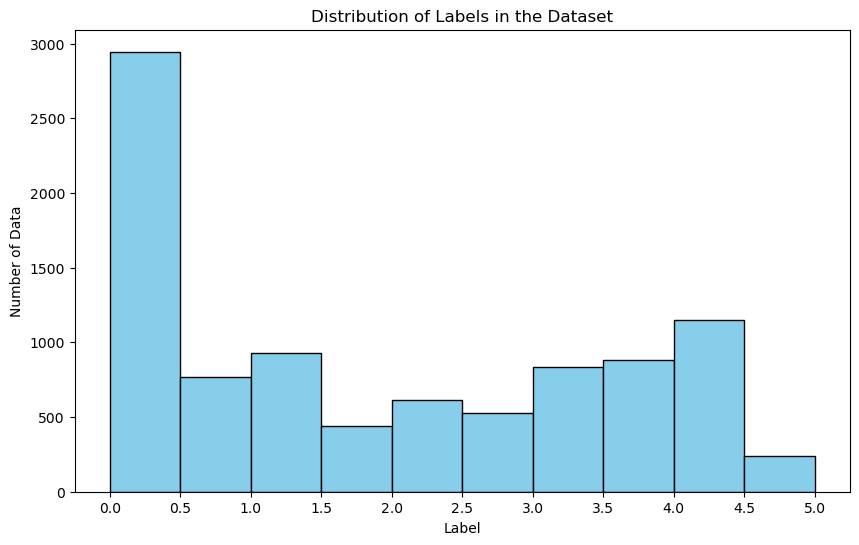

In [62]:
plt.figure(figsize=(10, 6))
train_df['label'].plot(kind='hist', bins=np.arange(0, 5.5, 0.5), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()

In [4]:
sr_df = pd.read_csv('../data/SR_train_3.csv')
sr_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도 있고 반전도 있고 여느 한국 영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고, 사랑도 있고 재미도 있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근 권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약 조건 변경해 주세요.,주택청약 무주택 기준 변경해 주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다 가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯 뿌듯하네요!!,꼬옥 실제로 한 번 뵈어요 뿌 뿌 푸~!~!,0.0,0.0


In [18]:
print(train_df.shape[0])
print(sr_df.shape[0])

9324
13763


In [52]:
# sr data에 스왑
sr_swapped = swap_sentence(sr_df)
# sr_swapped.to_csv("../data/sr_swapped.csv", index=False)

# sr data + swap + label 0 data 750개 copy
sr_swapped_copied = copy_sentence(sr_swapped)
# sr_swapped_copied.to_csv("../data/sr_swapped_copied.csv", index=False)

# sr data without 0 + swap + label 0 data 750개 copy
sr_without0_df = sr_df[sr_df["label"] != 0.0]
sr_only0_df = sr_df[sr_df["label"] == 0.0]
sr_without0_swapped = swap_sentence(sr_without0_df)
sr_swapped_without0 = pd.concat([sr_only0_df, sr_without0_swapped], ignore_index=True)
sr_without0_swapped.to_csv("../data/sr_without0_swapped.csv", index=False)

# sr_without0_swapped_copied = copy_sentence(sr_swapped_without0)
# sr_without0_swapped_copied.to_csv("../data/sr_without0_swapped_copied.csv", index=False)

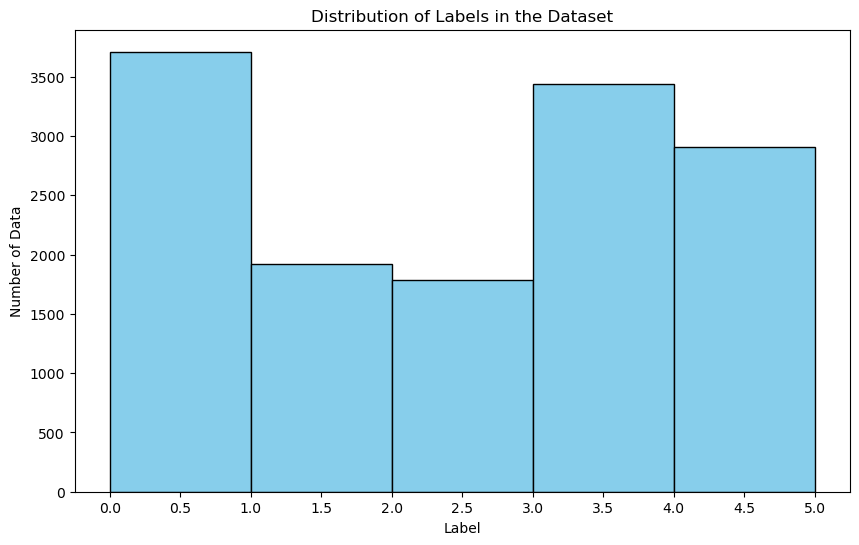

In [81]:
# sr_df dist
plt.figure(figsize=(10, 6))
sr_df['label'].plot(kind='hist', bins=np.arange(0, 5.5, 1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()

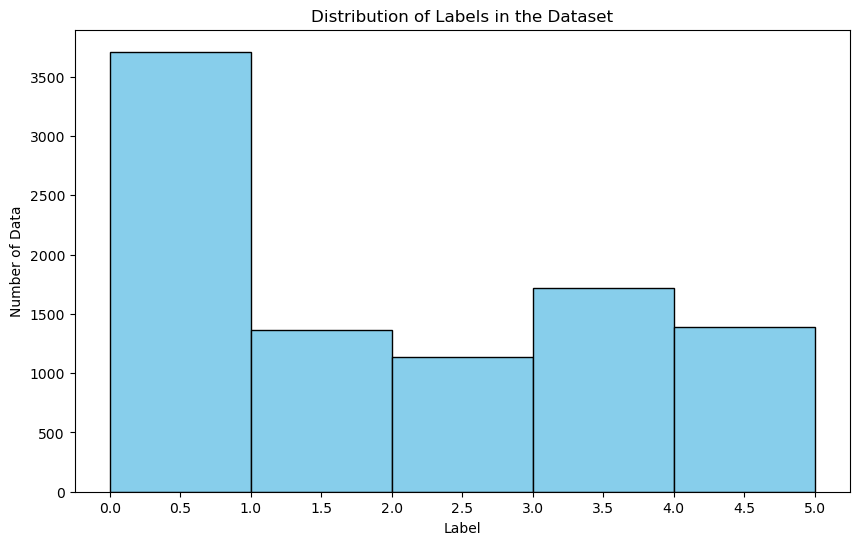

In [82]:
plt.figure(figsize=(10, 6))
train_df['label'].plot(kind='hist', bins=np.arange(0, 5.5, 1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()

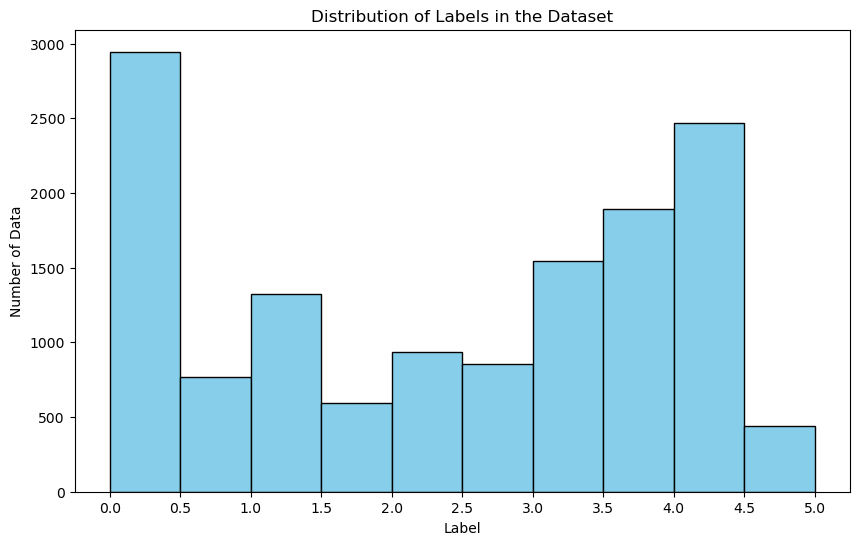

In [83]:
# sr_df dist
plt.figure(figsize=(10, 6))
sr_df['label'].plot(kind='hist', bins=np.arange(0, 5.5, 0.5), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()

In [5]:
mask = (
    ((sr_df['label'] >= 0.0) & (sr_df['label'] < 0.5)) |
    ((sr_df['label'] >= 3.0) & (sr_df['label'] < 4.5))
)

removed_mask = ~mask

# 0.0 - 0.5, 3.0 -4.5 만 가지는 데이터
sr_included_df = sr_df[mask]

# 0.0 - 0.5, 3.0 - 4.5 제외한 데이터
sr_removed_df = sr_df[removed_mask]

sr_removed_swapped = swap_sentence(sr_removed_df)
sr_range_swapped = pd.concat([sr_included_df, sr_removed_swapped], ignore_index=True)

sr_range_swapped.to_csv("../data/sr_range_swapped.csv", index=False)
sr_range_swapped_copied = copy_sentence(sr_range_swapped)
sr_range_swapped_copied.to_csv("../data/sr_range_swapped_copied.csv", index=False)



In [90]:
# 1.0 -3.0
sr_1_3 = sr_df[(sr_df['label'] >= 1.0) & (sr_df['label'] < 3.0)]
sr_rest = sr_df[((sr_df['label'] >= 0.0) & (sr_df['label'] < 1.0)) | 
                       (sr_df['label'] >= 3.0)]

sr_1_3_swapped = swap_sentence(sr_1_3)
sr_swap = pd.concat([sr_rest, sr_1_3_swapped], ignore_index=True)

sr_swap.to_csv("../data/sr_swap.csv", index=False)
sr_swap_copy = copy_sentence(sr_swap)
sr_swap_copy.to_csv("../data/sr_swap_copy.csv", index=False)

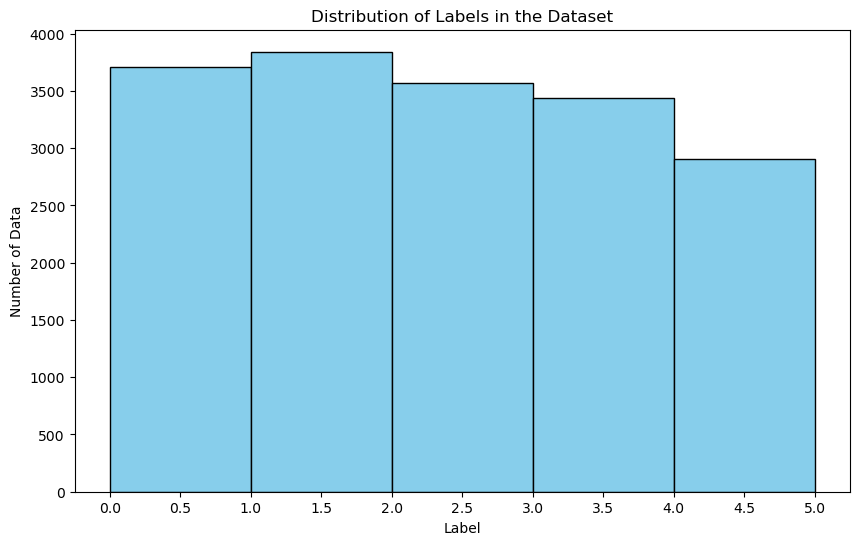

In [97]:
plt.figure(figsize=(10, 6))
sr_swap['label'].plot(kind='hist', bins=np.arange(0, 5.5, 1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()

In [92]:
print(sr_swap.shape[0])

17470


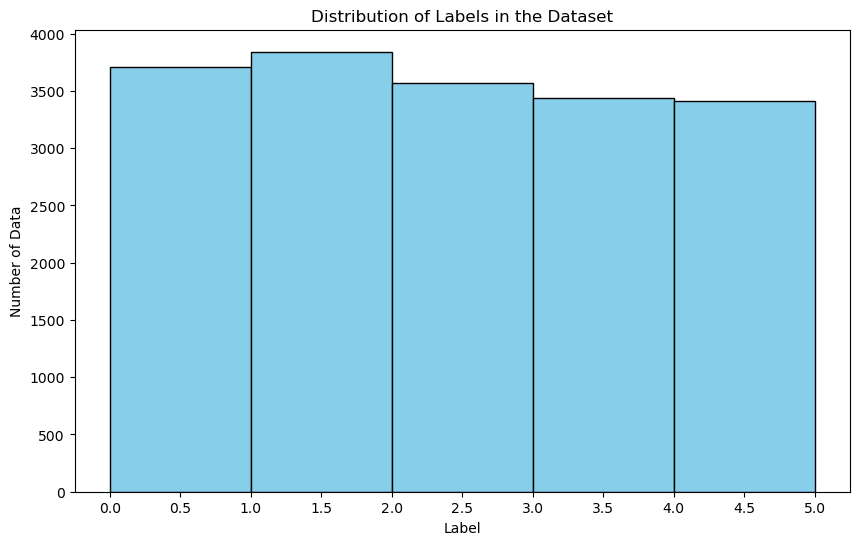

In [93]:
plt.figure(figsize=(10, 6))
sr_swap_copy['label'].plot(kind='hist', bins=np.arange(0, 5.5, 1), color='skyblue', edgecolor='black')

plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Distribution of Labels in the Dataset')
plt.show()

In [94]:
print(sr_swap_copy.shape[0])

17970
